In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('creditcard.csv')
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [6]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

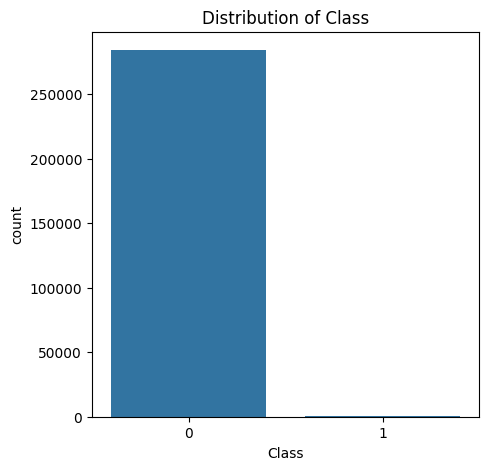

In [7]:
plt.figure(figsize=(5,5))
sns.countplot(x='Class',data= data)
plt.title('Distribution of Class')
plt.show()

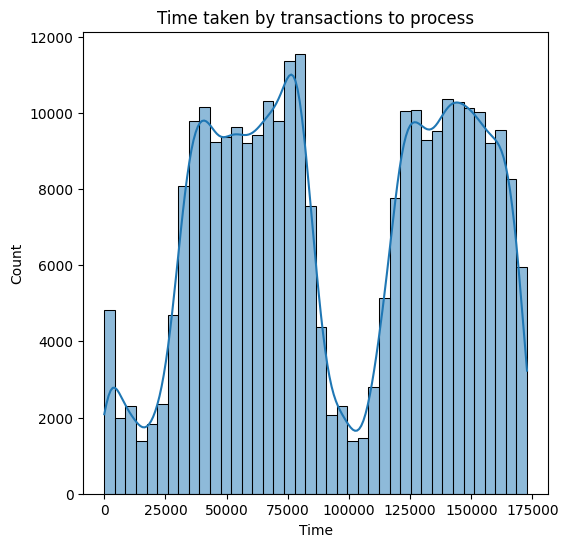

In [8]:
# time taken for a transaction to process
plt.figure(figsize=(6,6))
sns.histplot(data['Time'], bins=40,kde =True)
plt.title('Time taken by transactions to process')
plt.show()

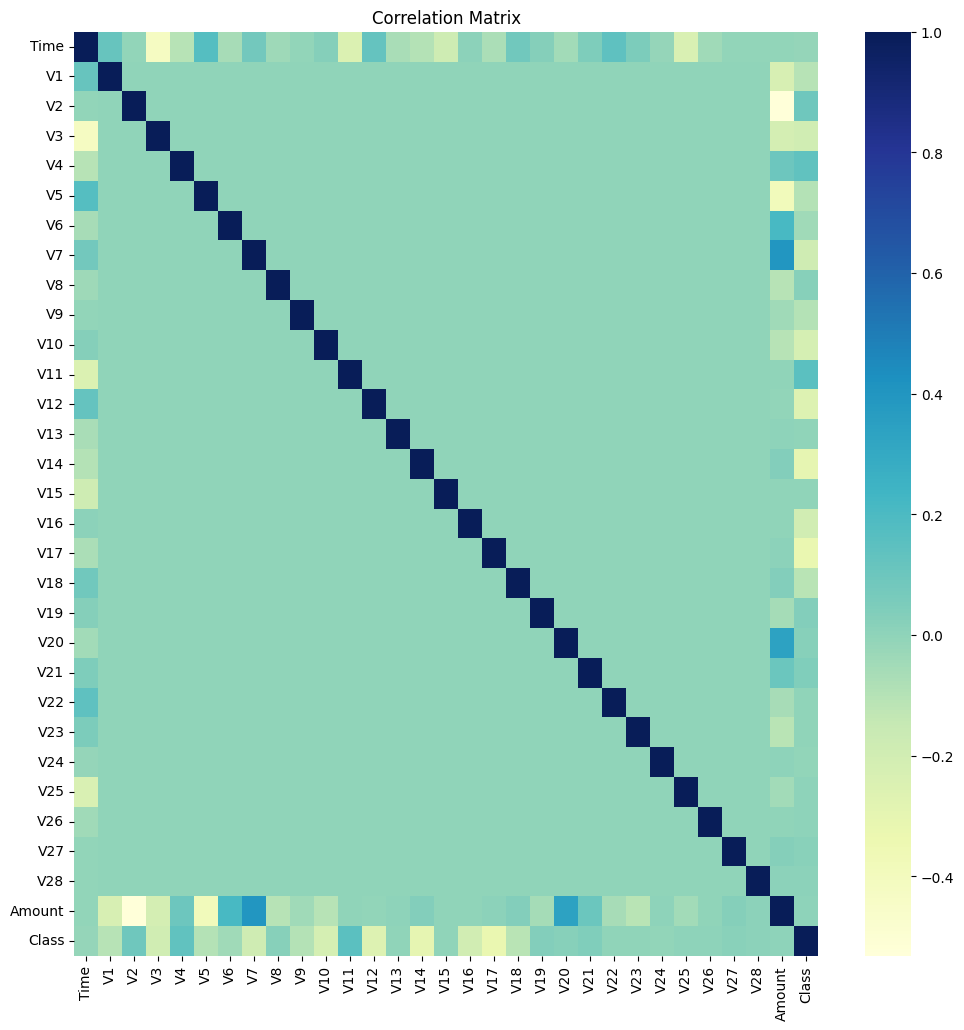

In [9]:
#correlation matrix
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), fmt='.3g',cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

In [10]:
# t-test to see the average difference between the average transaction time for fraudulent and non-fraudulent transactions

# H0 : There is no significant difference between transaction average time of fraudulent and non-fraudulent transactions
# H1 : There is a significant difference between transaction average time of fraudulent and non-fraudulent transactions

from scipy.stats import ttest_ind
fraudulent_transaction = data[data['Class']==1]['Time']
non_fraudulent_transaction = data[data['Class']==0]['Time']

# performing t-test
t_stat, p_val = ttest_ind(fraudulent_transaction, non_fraudulent_transaction)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_val}")

T-Statistic: -6.576701136533918
P-Value: 4.818268891795982e-11


In [11]:
# t-test to see the average difference between the transaction amount for fraudulent and non-fraudulent transactions

# H0 : There is no significant difference between transaction average amount for fraudulent and non-fraudulent transactions
# H1 : There is a significant difference between transaction average amount for fraudulent and non-fraudulent transactions

from scipy.stats import ttest_ind
fraudulent_transaction = data[data['Class']==1]['Amount']
non_fraudulent_transaction = data[data['Class']==0]['Amount']

# performing t-test
t_stat, p_val = ttest_ind(fraudulent_transaction, non_fraudulent_transaction)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_val}")

T-Statistic: 3.00555231397141
P-Value: 0.002651220649191683


In [12]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [13]:
# handling class imbalance 

from sklearn.utils import resample

fraudulent_transaction = data[data['Class']==1]
non_fraudulent_transaction = data[data['Class']==0]

#upsampling fraudulent(1) class

fraudulent_transaction_resampled = resample(fraudulent_transaction,
                                            replace=True,
                                            n_samples= len(non_fraudulent_transaction),
                                            random_state=100)

data_upsampled = pd.concat([fraudulent_transaction_resampled, non_fraudulent_transaction])

In [14]:
data_upsampled['Class'].value_counts()

Class
1    284315
0    284315
Name: count, dtype: int64

In [15]:
# splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

attributes = data_upsampled.drop(['Class'], axis =1)
target = data_upsampled['Class']

x_train, x_test, y_train, y_test = train_test_split(attributes, target, test_size=0.2, random_state=100)

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import recall_score, precision_score, f1_score

dt = DecisionTreeClassifier(criterion='entropy', splitter='random',max_depth=6,
                             random_state=100)

dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)

recall_dt = recall_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print(recall_dt, precision_dt, f1_dt)

0.9001325673884224 0.9635943915684309 0.9307830092118731


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


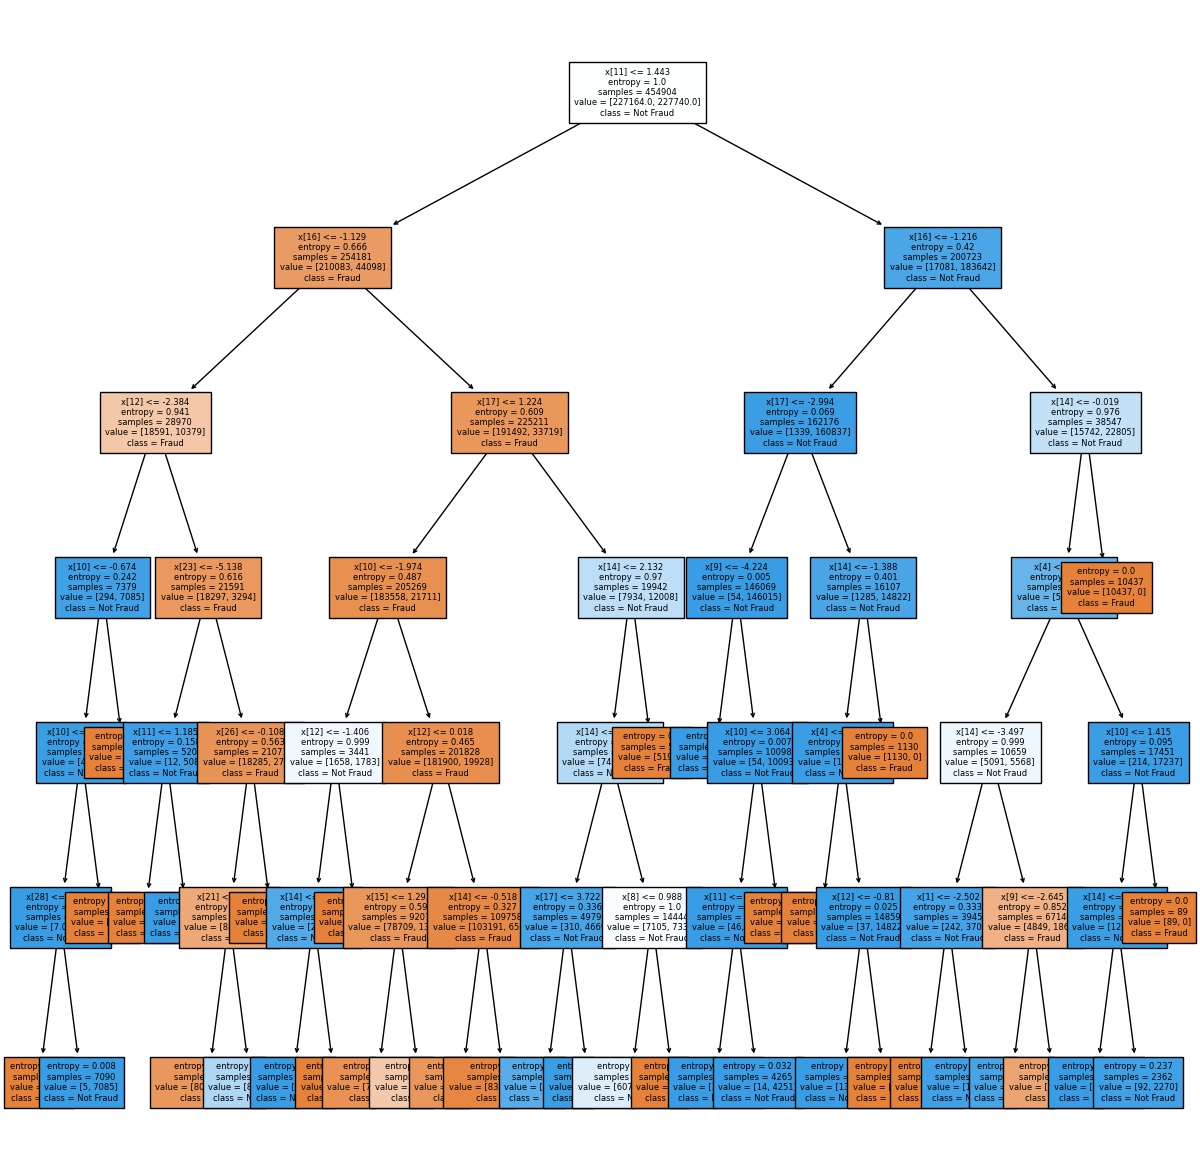

In [17]:
feature=attributes.columns
print(feature)
plt.figure(figsize=(15,15))
plot_tree(dt,filled=True,class_names=['Fraud','Not Fraud'],fontsize=6)
plt.show()

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rfc = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=8)

rfc.fit(x_train, y_train)

y_pred_rfc= rfc.predict(x_test)

recall = recall_score(y_test, y_pred_rfc)
precision = precision_score(y_test, y_pred_rfc)
f1 = f1_score(y_test, y_pred_rfc)

In [20]:
print(recall, precision, f1)

0.9691029606716748 0.9992345404508921 0.9839381213883206


In [21]:
from sklearn.metrics import confusion_matrix


In [22]:
confusion_matrix(y_test, y_pred_rfc)

array([[57109,    42],
       [ 1748, 54827]], dtype=int64)

In [23]:
confusion_matrix(y_test, y_pred_dt)

array([[55227,  1924],
       [ 5650, 50925]], dtype=int64)

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score

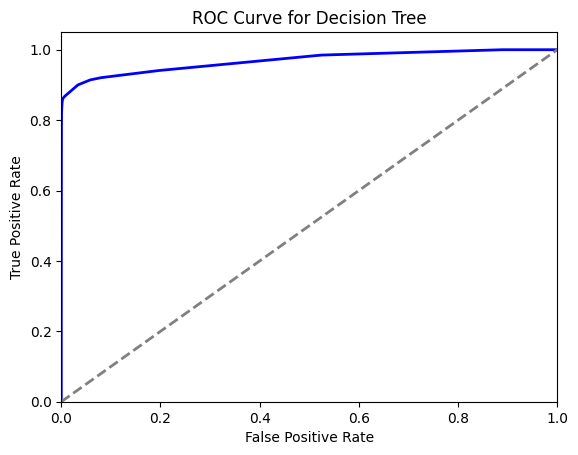

In [26]:
# ROC AUC curve for decision tree

y_pred_dt_prob = dt.predict_proba(x_test)[:,1]

fpr, tpr, _ =roc_curve(y_test, y_pred_dt_prob)
roc_auc = roc_auc_score(y_test, y_pred_dt_prob)



plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.show()

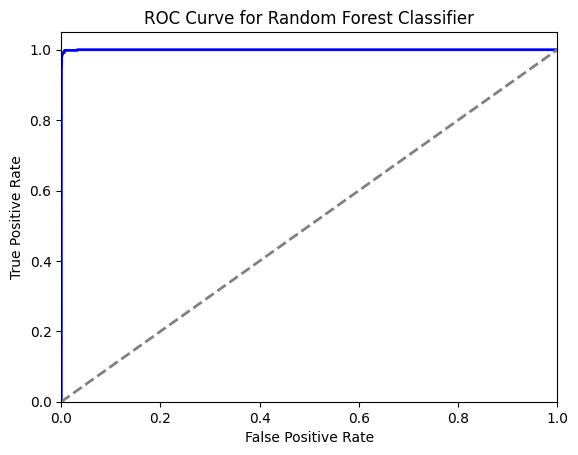

In [27]:
# ROC AUC curve for Random Forest Classifier

y_pred_rfc_prob = rfc.predict_proba(x_test)[:,1]

fpr, tpr, _ =roc_curve(y_test, y_pred_rfc_prob)
roc_auc = roc_auc_score(y_test, y_pred_rfc_prob)



plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.show()

* Random Forest Classifer seems to overfit the data, giving a precision score=.99 and f1 score=.98
* Whereas Decision Tree Classifier gives a decent precision score and f1 score both below .97

**It is better to select decision tree model to classify the data and also decision tree is best suited for Binary Classification dataset. The parameters for the Decision Tree model are:**

* criterion='entropy'
* splitter='random'
* max_depth=6
* random_state=100